# Mechanism of Action (MoA) Prediction

## importing important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick           # For specifying the axes tick format 
import warnings
warnings.filterwarnings('ignore')
import datetime

## Reading Data

In [2]:
train = pd.read_csv("/home/abdelmoneim/سطح المكتب/for graduation project/dataset/train_features.csv")
train_1 = train.copy()
train_1.sample(5)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
21132,id_e2b85857a,trt_cp,48,D1,0.8073,0.3350,0.7682,0.0641,-1.5770,-0.6615,...,-1.1170,0.4759,-0.7946,-1.5750,0.3978,1.1630,1.1880,0.5087,0.2013,-0.9318
5223,id_3845a939b,trt_cp,24,D1,-0.3372,-1.1520,0.9385,0.7945,-0.1418,0.1623,...,0.5959,0.4910,-0.0113,-0.3215,-0.0501,0.8671,-0.7323,-0.3006,0.6610,-0.5428
20834,id_df50edb50,trt_cp,48,D1,1.0300,0.3013,0.4018,-0.1913,2.2190,-0.0220,...,1.4610,1.1370,0.7256,1.3490,1.5420,0.1719,1.3300,0.3973,0.6561,0.7551
15606,id_a7ebea81d,trt_cp,48,D1,0.5065,-0.3858,0.3894,-0.2145,1.4660,0.0767,...,0.0662,0.5414,0.6674,-0.1855,0.1247,-0.1671,0.1056,0.2177,-0.3491,1.1380
14764,id_9eaaccabe,trt_cp,72,D2,2.2170,-0.3153,0.9192,-1.5370,-0.3178,0.1858,...,-0.6179,0.4962,-0.2570,0.6966,-0.5916,-0.2076,-0.0518,-0.4329,0.8529,-0.5549


In [3]:
test = pd.read_csv("/home/abdelmoneim/سطح المكتب/for graduation project/dataset/test_features.csv")
test.sample(5)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
3644,id_ea22629ad,trt_cp,24,D2,0.8582,-0.5296,-0.3545,1.2960,0.8140,-0.5634,...,0.3538,1.7270,-0.4547,-0.9040,-0.0188,-0.3426,0.7106,-0.3046,-0.3787,0.0681
1599,id_6830869a3,trt_cp,48,D2,-0.3585,0.3436,0.1179,0.6209,-0.4543,0.0377,...,0.1841,-0.1755,0.5035,-0.2050,0.6339,0.2018,1.1110,-0.0422,0.8296,-0.3399
2517,id_a1767101d,trt_cp,48,D1,-0.3823,-0.3648,0.0333,-1.0010,2.4950,0.1424,...,-1.7720,-3.9370,-1.7100,-1.1390,-1.8150,-2.9810,-2.7410,-1.4700,-3.6950,-2.5100
539,id_23d0954e9,trt_cp,48,D2,-0.6690,-0.5592,0.4338,0.0306,-0.2643,0.9892,...,0.1058,-0.2881,-0.4571,-0.6150,-0.2734,0.6982,-1.2280,0.3814,0.3233,-0.3637
1803,id_73e8cf947,trt_cp,48,D1,-0.4701,-0.2585,2.7170,-0.1713,0.5524,0.6039,...,0.2359,0.7840,1.1800,0.4729,0.5098,0.3495,0.3141,-0.5550,-0.2494,0.3612


In [4]:
scored_target = pd.read_csv("/home/abdelmoneim/سطح المكتب/for graduation project/dataset/train_targets_scored.csv")
scored_target.sample(5)

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
20747,id_de7bd5f9d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13415,id_909d0d669,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18861,id_ca95f8590,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22506,id_f1c30df80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15858,id_aa8617170,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
non_scored_target = pd.read_csv("/home/abdelmoneim/سطح المكتب/for graduation project/dataset/train_targets_nonscored.csv")
non_scored_target.sample(5)

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
12452,id_8622e4420,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10779,id_740e9859a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15493,id_a6d3ff42f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14499,id_9bfe1f3fd,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16708,id_b38f4db3f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# reading the shape of the train, test and target data
print('the shape of the training data', train_1.shape)
print('the shape of the testing data', test.shape)
print('the shape pf the scored target data', scored_target.shape)
print('the shape of the non scored target data', non_scored_target.shape)

the shape of the training data (23814, 876)
the shape of the testing data (3982, 876)
the shape pf the scored target data (23814, 207)
the shape of the non scored target data (23814, 403)


In [8]:
train.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


## Exploratory Data Analysis (EDA)

### Data Preprocessing

In [9]:
# function to chech if there is a null and duplicate values
def check(data):
    duplicates = data[data.duplicated()]
    null_values = data.isna().sum().sum()

    if duplicates.shape[0] == 0 and null_values == 0:
        return True
    else:
        return False

print(check(train_1))
print(check(test))
print(check(scored_target))

True
True
True


### Univariate Analysis - Categorical Features

#### CP_TYPE

In [9]:
train_1['cp_type'].value_counts()

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64

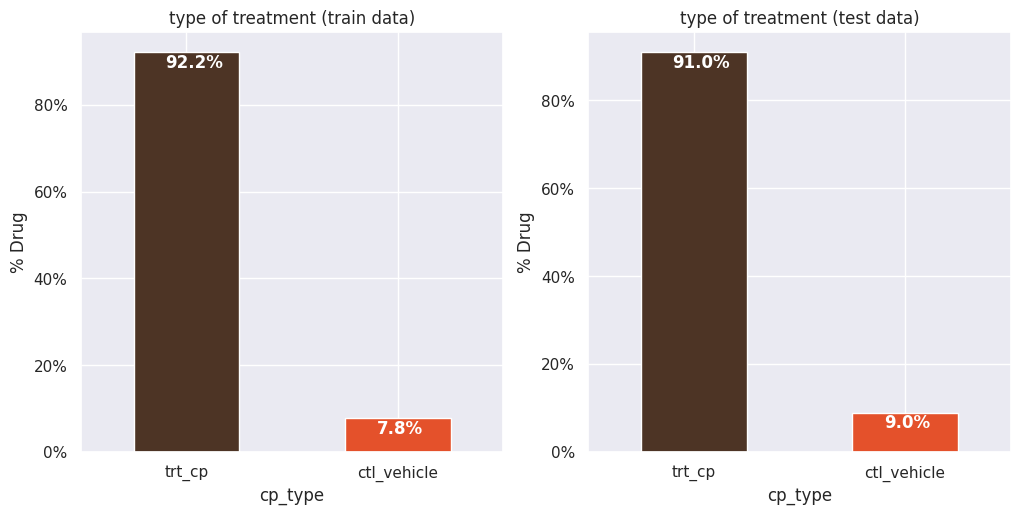

In [10]:
colors = ['#4D3425','#E4512B']

# train data
plt.figure(figsize = (12, 12))
plt.subplot(221)
ax = (train_1['cp_type'].value_counts()*100.0 /len(train_1)).plot(kind = 'bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Drug')
ax.set_xlabel('cp_type')
ax.set_title('type of treatment (train data)')

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize = 12,
            color = 'white',
           weight = 'bold')

# test data
plt.subplot(222)
ax_1 = (test['cp_type'].value_counts()*100.0 /len(test)).plot(kind = 'bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax_1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax_1.set_ylabel('% Drug')
ax_1.set_xlabel('cp_type')
ax_1.set_title('type of treatment (test data)')
    
totals = []
for i in ax_1.patches:
    totals.append(i.get_width())

total = sum(totals)
for i in ax_1.patches:
    ax_1.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize = 12,
            color = 'white',
           weight = 'bold')

<h5>OBSERVATION</h5>
<b> 1.) In both the train and the test dataset, we find a similar rate of imbalance in terms of the way treatment was provided as in whether samples were treated with compounds or with control perturbation.

</b>

  
<b> 2.) Samples treated with compounds are around 92.2 % and 91.0 % while  control perturbation treatments are 7.8% and 9.0% samples in train and test dataset respectively.</b>

#### CP_TIME

In [11]:
train_1['cp_time'].value_counts()

48    8250
72    7792
24    7772
Name: cp_time, dtype: int64

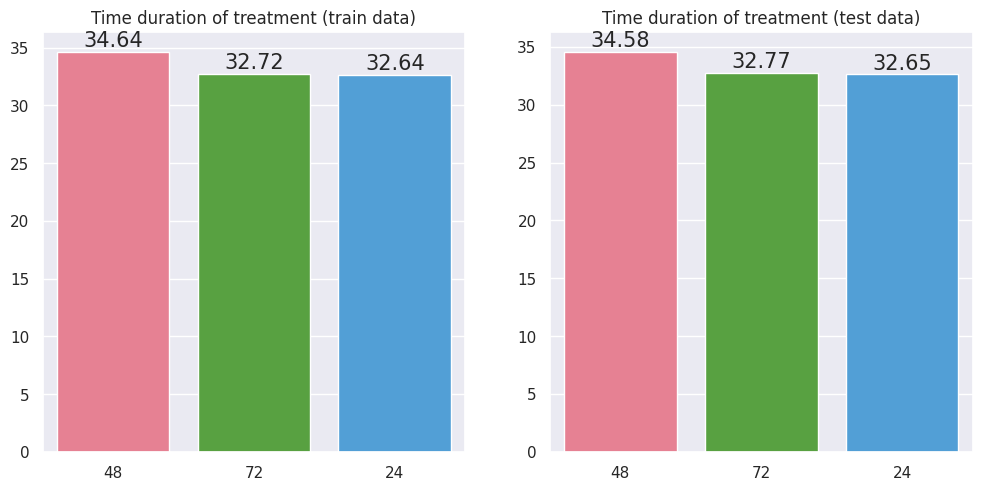

In [12]:
# train data
plt.figure(figsize=(12,12))
plt.subplot(221)

perccentage_48 = train_1['cp_time'].value_counts().iloc[0]*100/len(train_1['cp_time'])
perccentage_72 = train_1['cp_time'].value_counts().iloc[1]*100/len(train_1['cp_time'])
perccentage_24 = train_1['cp_time'].value_counts().iloc[2]*100/len(train_1['cp_time'])
                                                                        
plots = sns.barplot(y = [perccentage_48, perccentage_72, perccentage_24],x = ['48','72','24'],palette = 'husl')

plt.title("Time duration of treatment (train data)")

for bar in plots.patches:
    
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

# test data
plt.subplot(222)

perccentage_48 = test['cp_time'].value_counts().iloc[0]*100/len(test['cp_time'])
perccentage_72 = test['cp_time'].value_counts().iloc[1]*100/len(test['cp_time'])
perccentage_24 = test['cp_time'].value_counts().iloc[2]*100/len(test['cp_time'])
                                                                        
plots = sns.barplot(y = [perccentage_48, perccentage_72, perccentage_24],x = ['48','72','24'], palette = 'husl')

plt.title("Time duration of treatment (test data)")

for bar in plots.patches:
    
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

<h5>OBSERVATION</h5>

<b> 1.) The datasets contain samples treated and observed at different time intervals-24,48,72 hours.

</b>

  
<b> 2.)In both the train and the test dataset, there are more number of samples observed after 48 hours in comparison to samples observation after 24 and 72 hours around 34.64% and 34.58% in train and test dataset respectively.</b>


#### CP_DOSE

In [13]:
train_1['cp_dose'].value_counts()

D1    12147
D2    11667
Name: cp_dose, dtype: int64

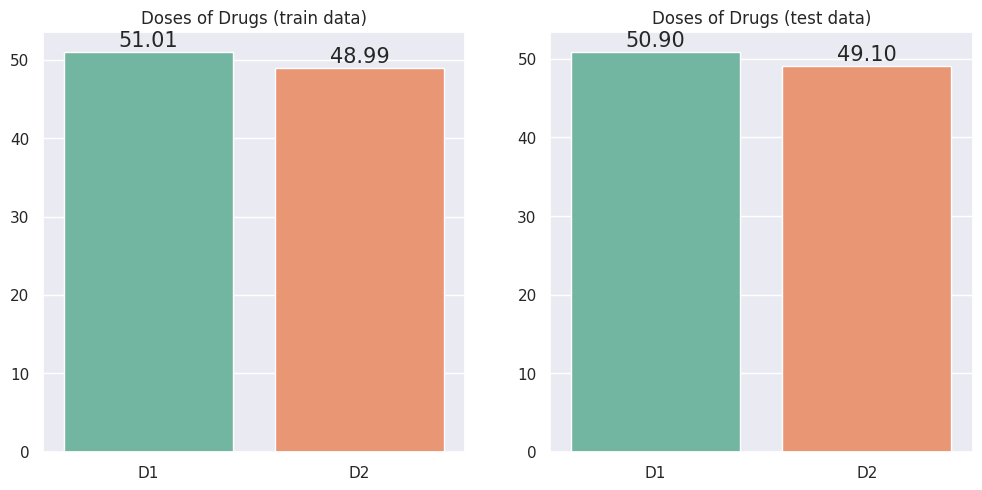

In [14]:
# train data
plt.figure(figsize=(12,12))
plt.subplot(221)

perccentage_D1 = train_1['cp_dose'].value_counts().iloc[0]*100/len(train_1['cp_dose'])
perccentage_D2 = train_1['cp_dose'].value_counts().iloc[1]*100/len(train_1['cp_dose'])
                                                                        
plots = sns.barplot(y = [perccentage_D1, perccentage_D2],x = ['D1','D2'],palette = 'Set2')

plt.title("Doses of Drugs (train data)")

for bar in plots.patches:
    
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

# test data
plt.subplot(222)

perccentage_D1 = test['cp_dose'].value_counts().iloc[0]*100/len(test['cp_dose'])
perccentage_D2 = test['cp_dose'].value_counts().iloc[1]*100/len(test['cp_dose'])
                                                                        
plots = sns.barplot(y = [perccentage_D1, perccentage_D2],x = ['D1','D2'],palette = 'Set2')

plt.title("Doses of Drugs (test data)")

for bar in plots.patches:
    
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

<h5>OBSERVATION</h5>

<b> 1.) The datasets contain samples treated with two different dosages of drugs D1 and D2 .

</b>
 
<b> 2.)There are more number of samples treated with dosage D1 than dosage D2 around 51.01% and 50.90% in the train and the test dataset respectively.Hence, this is a balanced feature. </b>

###  Univariate Analysis- Gene Expression levels features

In [10]:
#separating gene feautres and cell features in a separate list
#we know that all the gene expression features name starts with 'g-' and cell features name starts with 'c-'
gene_features = []
cell_features = []

for i in train_1.columns:
    if i.startswith('g-'):
        gene_features.append(i)
    if i.startswith('c-'):
        cell_features.append(i)

print(len(gene_features))
print(len(cell_features))

772
100


In [16]:
train_1[gene_features].sample()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
1134,0.1848,0.1796,0.0459,-0.6199,-0.1789,1.156,-0.7294,-0.7024,0.0112,-0.3065,...,0.2581,-0.553,0.578,-0.1364,0.4863,-0.4626,0.1383,0.4942,0.6179,-0.126


<Axes: title={'center': 'Distribution of all gene features in test dataset'}, ylabel='Density'>

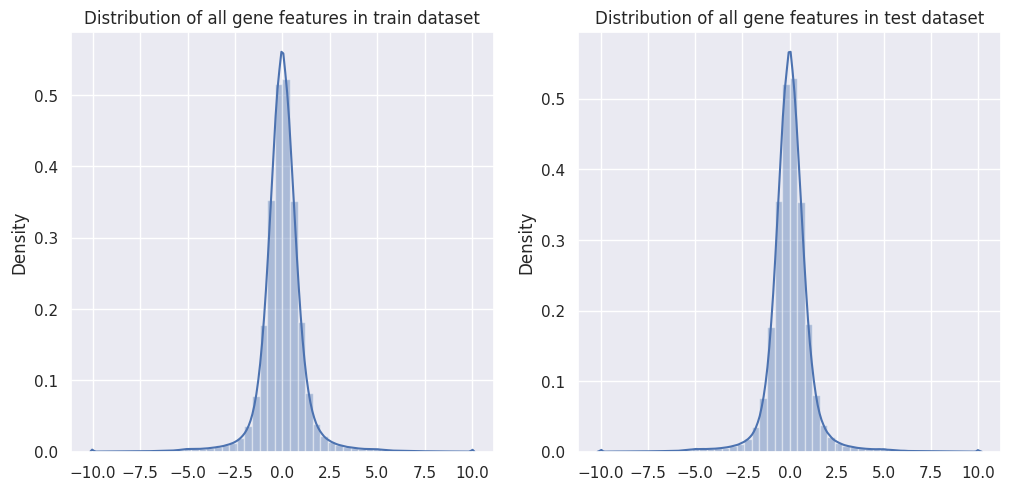

In [17]:
# Distribution of all gene features
plt.figure(figsize = (12, 12))

plt.subplot(221)
plt.title('Distribution of all gene features in train dataset')
sns.distplot(train_1[gene_features])

plt.subplot(222)
plt.title('Distribution of all gene features in test dataset')
sns.distplot(test[gene_features])

In [20]:
print('train dataset')
print(np.percentile(train_1[gene_features], 0), ':', np.percentile(train_1[gene_features],100))
print('test dataset')
print(np.percentile(test[gene_features], 0), ':', np.percentile(test[gene_features],100))

train dataset
-10.0 : 10.0
test dataset
-10.0 : 10.0


<h5>OBSERVATION</h5>

<b>1.) Both Train and Test dataset share a similar distribution of gene features</b>

<b> 2.) The plot looks similar to Gaussian distribution with mean around 0. The values are also negative which implies that certain gene values got downregulated by certain drugs while certain genes got upregulated by certain drugs.

</b>

  
<b> 3.)The downregulation of some genes are as low as -10 while upregulation of some genes are as high as +10.0.</b>

### Multivariate Analysis- Gene Expression levels features

In [21]:
# function to see the correlation between features
def correlated_features(dataset ,threshold, val1, val2, type_positive):
    
    col_name = []
    cor = dataset.corr()
    data1 = []

    for i in range(len(cor.columns)):
        for j in range(i):

            if(cor.iloc[i,j] > threshold and type_positive == True):
                data = [cor.columns[i], cor.columns[j], cor.iloc[i,j]]
                data1.append(data)
                
            if(cor.iloc[i,j] < threshold and type_positive == False):
                data = [cor.columns[i], cor.columns[j], cor.iloc[i,j]]
                data1.append(data)

    data2 = pd.DataFrame(data1, columns = [val1, val2, 'correlation'])             
    return data2  

In [22]:
#MoAs which are highly correlated positive
positive_correlated = correlated_features(train[gene_features], .8, 'gene_1', 'gene_2', True)
positive_correlated

,gene_1,gene_2,correlation
0,g-50,g-37,0.907061
1,g-72,g-37,0.818555
2,g-195,g-63,0.832779
3,g-228,g-195,0.807209
4,g-257,g-50,0.804985
5,g-406,g-369,0.804883
6,g-410,g-369,0.825646
7,g-417,g-261,0.806017
8,g-417,g-328,0.805924
9,g-460,g-123,0.806428


In [23]:
#MoAs which are highly correlated positive
negative_correlated = correlated_features(train[gene_features], -0.8, 'gene_1', 'gene_2', False)
negative_correlated

,gene_1,gene_2,correlation
0,g-349,g-63,-0.806210
1,g-349,g-228,-0.820275
2,g-460,g-228,-0.807640
3,g-744,g-228,-0.808788
4,g-760,g-248,-0.809137


### Univariate Analysis- Cell Viability features

In [24]:
train_1[cell_features].sample()

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23112,-10.0,-10.0,-10.0,-9.561,-10.0,-10.0,-10.0,-8.499,-10.0,-6.524,...,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-8.07,-10.0,-7.847


<Axes: title={'center': 'Distribution of all cell features in test dataset'}, ylabel='Density'>

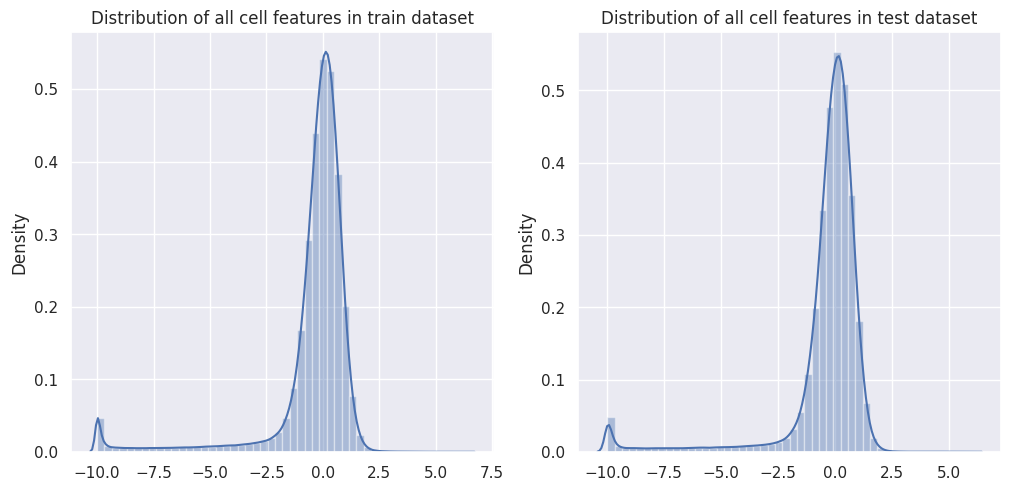

In [25]:
# Distribution of all cell features
plt.figure(figsize = (12, 12))

plt.subplot(221)
plt.title('Distribution of all cell features in train dataset')
sns.distplot(train_1[cell_features])

plt.subplot(222)
plt.title('Distribution of all cell features in test dataset')
sns.distplot(test[cell_features])

In [26]:
print('train dataset')
print(np.percentile(train_1[cell_features], 0), ':', np.percentile(train_1[cell_features],100))
print('test dataset')
print(np.percentile(test[cell_features], 0), ':', np.percentile(test[cell_features],100))

train dataset
-10.0 : 6.412
test dataset
-10.0 : 6.024


<h5>OBSERVATION</h5>

<b> 1.) Both Train and Test dataset share a similar distribution of cell features.

<b> 2.) The plot looks similar to Gaussian distribution with mean around 0 within a certain range, but one can observe that there are certainly more number of negative valued cell features than positive with a  small peak -10.0.
</b>

  
<b> 3.)The cell viability of certain cell lines  are as low as -10.0 while for some cell lines for some drugs as high as +6.412.0.</b>

<b> 4.) A small peak around -10 suggests that most of the cells in the cell lines collapsed on coming in contact of most of the drugs.</b>

### Multivariate Analysis-Cell Viability features

In [27]:
#Cell features which are positively highly correlated 
positive_correlated = correlated_features(train_1[cell_features], 0, 'cell_line_1', 'cell_line_2', True)
positive_correlated.sort_values(by = 'correlation', ascending = False).head(10)

,cell_line_1,cell_line_2,correlation
1368,c-52,c-42,0.924619
2641,c-73,c-13,0.923344
338,c-26,c-13,0.921875
534,c-33,c-6,0.914730
1496,c-55,c-11,0.914637
1991,c-63,c-38,0.914578
4409,c-94,c-38,0.914368
4384,c-94,c-13,0.914001
1330,c-52,c-4,0.913649
865,c-42,c-4,0.913242


In [28]:
positive_correlated[positive_correlated['correlation'] > 0.9]

,cell_line_1,cell_line_2,correlation
2,c-2,c-1,0.901416
8,c-4,c-2,0.909991
57,c-11,c-2,0.904968
59,c-11,c-4,0.904082
80,c-13,c-2,0.910497
...,...,...,...
4446,c-94,c-75,0.900839
4564,c-96,c-4,0.901603
4566,c-96,c-6,0.900005
4593,c-96,c-33,0.900685


### Univariate Analysis- Target Variables

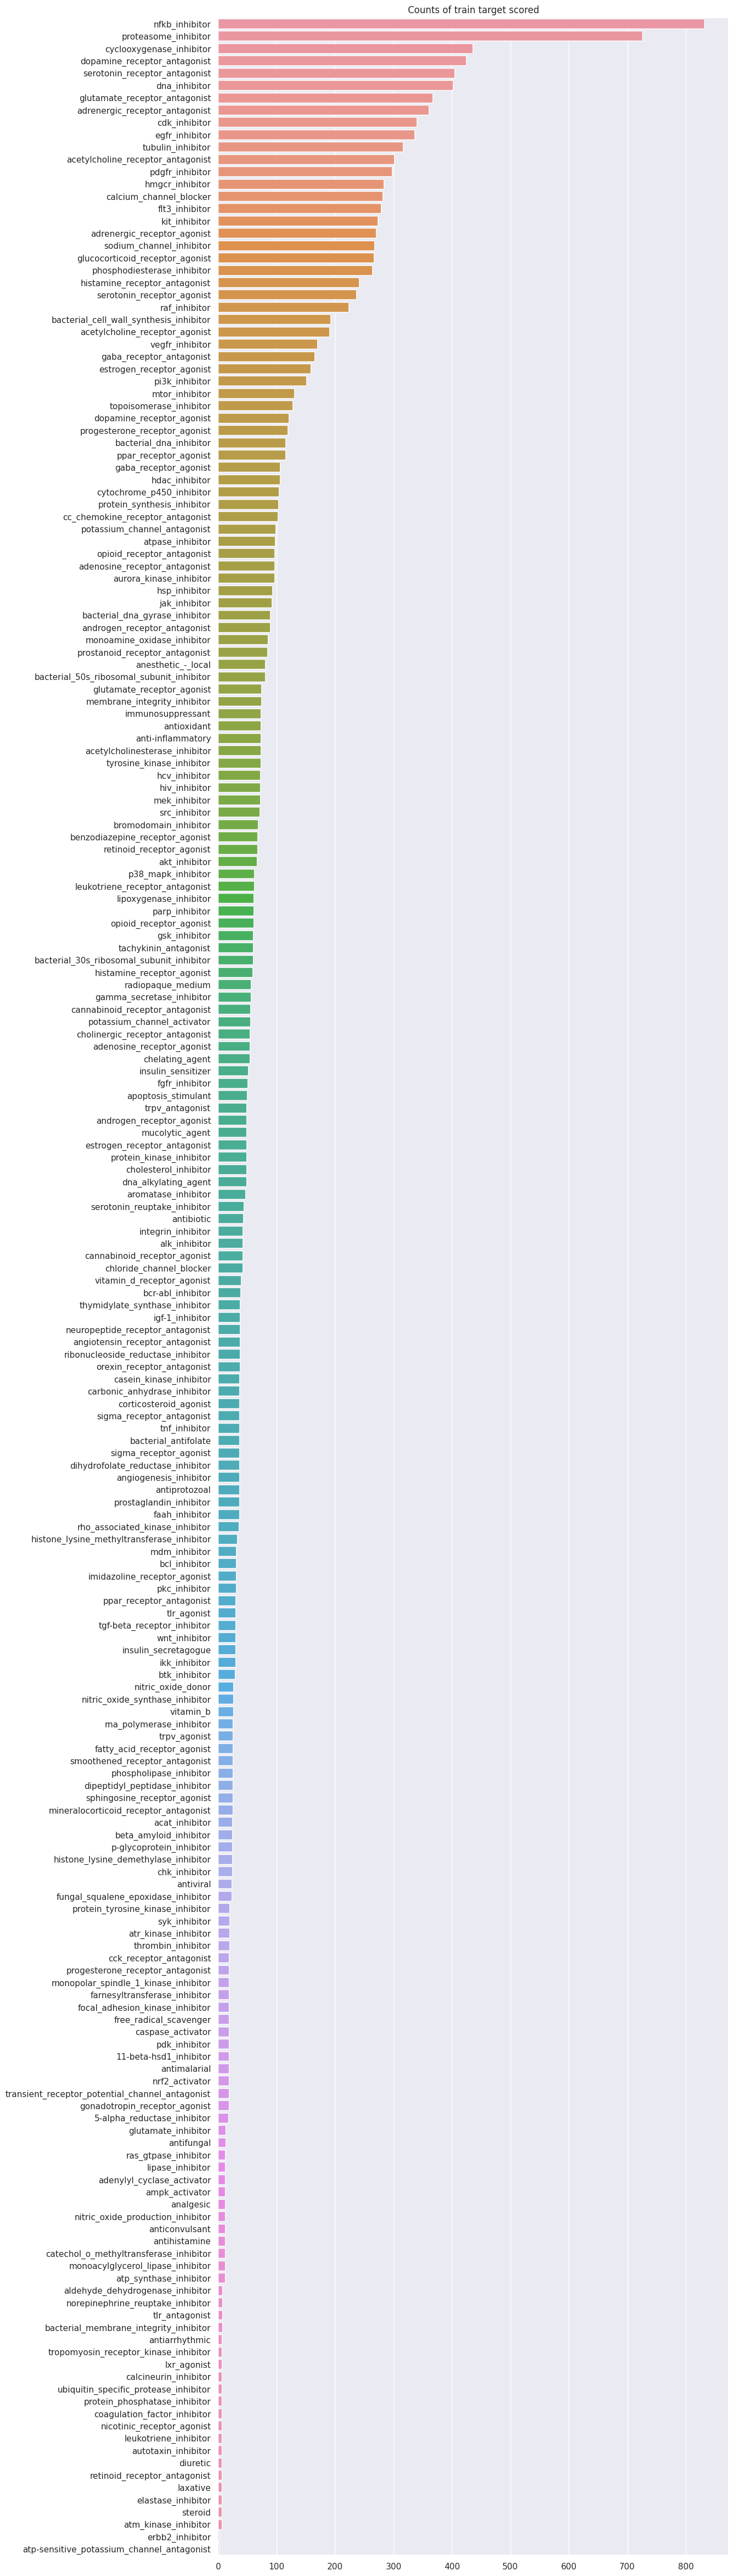

In [29]:
# plot the count of MOAs present in the dataset
plt.figure(figsize = (12, 60))
sns.barplot(x = scored_target.sum(axis = 0)[1:].sort_values(ascending = False).values,
            y = scored_target.sum(axis = 0)[1:].sort_values(ascending = False).index)
plt.title('Counts of train target scored')
plt.show()

In [30]:
scored_target.sum(axis = 0)[1:].sort_values(ascending = False).head(5)

nfkb_inhibitor                   832
proteasome_inhibitor             726
cyclooxygenase_inhibitor         435
dopamine_receptor_antagonist     424
serotonin_receptor_antagonist    404
dtype: object

In [31]:
scored_target.sum(axis = 0)[1:].sort_values(ascending = False).tail(5)

elastase_inhibitor                            6
steroid                                       6
atm_kinase_inhibitor                          6
erbb2_inhibitor                               1
atp-sensitive_potassium_channel_antagonist    1
dtype: object

<h5>OBSERVATION</h5>

<b> 1.) 'nfkb_inhibitor' is the most occuring MoA in the training dataset with a frequency of 832 and 'Proteasome_inhibitor' is the second most occuring MoA in the training set.</b>



<b> 2.) Most of the MoAs are occuring less than 100 number of times.</b>

<b> 3.)The are certain MoA's like 'erbb2_inhibitor' and 'atp-sensitive_potassium_channel_antagonist' not occuring even once.</b>

Text(0, 0.5, 'COUNT')

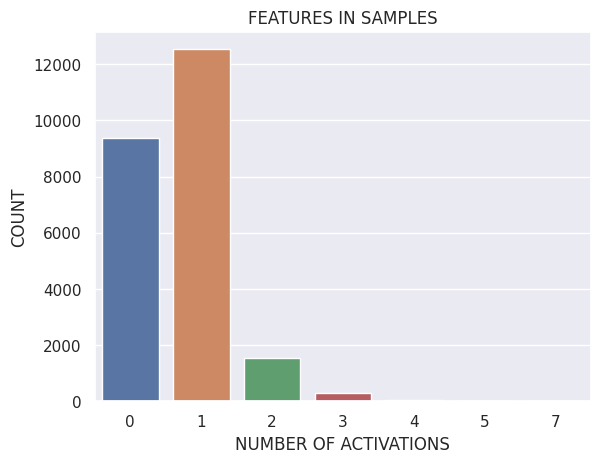

In [47]:
# Getting number of targets per sample

feature = scored_target.columns.values[1:]

sns.countplot(x = scored_target[feature].sum(axis = 1))
plt.title('FEATURES IN SAMPLES')
plt.xlabel('NUMBER OF ACTIVATIONS')
plt.ylabel('COUNT')

In [49]:
scored_target.sum(axis = 1).value_counts().sort_index()

0     9367
1    12532
2     1538
3      303
4       55
5       13
7        6
dtype: int64

<h5>OBSERVATION</h5>

<b> 1.) As one can observe from the above histogram that most number of MoAs simultaneously occurring in a single datapoint is 1. Hence one can say that for most of the cases training set is behaving like a multi class classification while for some points behaving like multi-label class classification </b>



<b> 2.) The second most occurring case is of the samples which does not give rise to any kind of MoA.</b>

<b> 3.)There are some cases with multiple occurring MoAs in a sample, the maximum number of MoAs occurring together in any sample in the train dataset is 7.</b>

###  Multivariate Analysis- Target Variables

<Axes: title={'center': 'Correlation between Train Target Scored Variables'}>

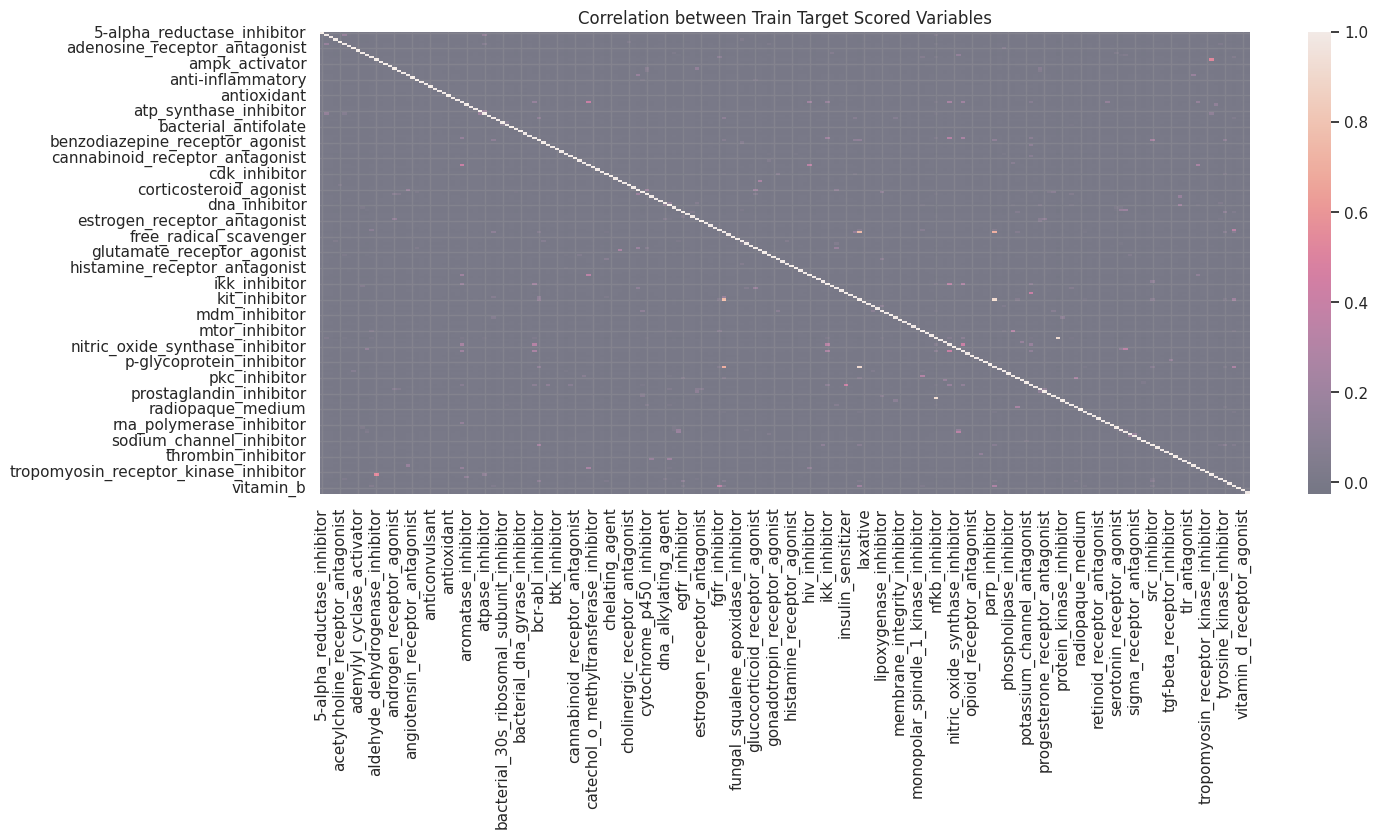

In [51]:
#correlation between 206 MoA train target scored variables
targets_all=scored_target[feature]
plt.figure(figsize=(15,6))

plt.title("Correlation between Train Target Scored Variables")
sns.heatmap(targets_all.corr(), alpha = 0.5)

In [50]:
#MoAs which are highly correlated
correlated_MoAs = correlated_features(scored_target[feature], 0.9, 'MoA_1', 'MoA_2', type_positive = True)
correlated_MoAs

,MoA_1,MoA_2,correlation
0,pdgfr_inhibitor,kit_inhibitor,0.915603
1,proteasome_inhibitor,nfkb_inhibitor,0.921340


## Feature Selection / Feature Extraction

#### Gene Features

- This is quite a possible situation that one gene feature might help in separation of one target variable while can be least important for another one. for example consider gene expression 'g-10' values for MoA 'nfkb_inhibitor' and '5-alpha_reductase_inhibitor'  separately (make sure the target variables are not correlated)

##### Variance Threshold

In [11]:
#merging the train dataset and train target scored dataset into one
train_merge = pd.merge(train_1, scored_target, on = "sig_id", how = "left")

In [53]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 1)
selector.fit_transform(train_merge[gene_features])

array([[ 1.062 , -0.2479, -0.1944, ...,  1.649 ,  0.2968, -0.0224],
       [ 0.0743,  0.2991,  1.019 , ..., -0.334 , -0.3289, -0.2718],
       [ 0.628 ,  1.554 , -0.0323, ...,  0.3143,  0.8133,  0.7923],
       ...,
       [ 0.3942,  0.3109,  0.5505, ...,  0.2326, -0.6191,  0.3603],
       [ 0.666 ,  0.4392,  0.8531, ...,  0.3109, -0.3491, -0.4741],
       [-0.8598, -0.1361, -0.3611, ...,  0.3633, -3.197 ,  2.219 ]])

In [54]:
# selecting feature which having variance greater the 1
train_merge[gene_features].columns[selector.get_support()]

Index(['g-0', 'g-2', 'g-4', 'g-5', 'g-7', 'g-8', 'g-9', 'g-10', 'g-11', 'g-12',
       ...
       'g-761', 'g-762', 'g-763', 'g-764', 'g-765', 'g-766', 'g-767', 'g-769',
       'g-770', 'g-771'],
      dtype='object', length=585)

In [55]:
# features which are having variance less than 1
[cols for cols in train_merge[gene_features] if cols not in train_merge[gene_features].columns[selector.get_support()]]

['g-1',
 'g-3',
 'g-6',
 'g-15',
 'g-18',
 'g-19',
 'g-21',
 'g-22',
 'g-23',
 'g-25',
 'g-32',
 'g-39',
 'g-43',
 'g-44',
 'g-49',
 'g-52',
 'g-64',
 'g-66',
 'g-71',
 'g-73',
 'g-76',
 'g-77',
 'g-78',
 'g-81',
 'g-87',
 'g-89',
 'g-94',
 'g-99',
 'g-104',
 'g-110',
 'g-111',
 'g-119',
 'g-120',
 'g-122',
 'g-124',
 'g-127',
 'g-149',
 'g-150',
 'g-151',
 'g-153',
 'g-171',
 'g-179',
 'g-184',
 'g-192',
 'g-193',
 'g-205',
 'g-212',
 'g-216',
 'g-217',
 'g-219',
 'g-225',
 'g-227',
 'g-233',
 'g-236',
 'g-237',
 'g-240',
 'g-246',
 'g-256',
 'g-260',
 'g-262',
 'g-263',
 'g-267',
 'g-268',
 'g-273',
 'g-274',
 'g-277',
 'g-278',
 'g-279',
 'g-283',
 'g-292',
 'g-303',
 'g-305',
 'g-307',
 'g-312',
 'g-318',
 'g-324',
 'g-331',
 'g-333',
 'g-340',
 'g-343',
 'g-345',
 'g-346',
 'g-348',
 'g-352',
 'g-355',
 'g-363',
 'g-382',
 'g-383',
 'g-384',
 'g-396',
 'g-397',
 'g-404',
 'g-408',
 'g-412',
 'g-415',
 'g-420',
 'g-430',
 'g-432',
 'g-435',
 'g-444',
 'g-446',
 'g-448',
 'g-453',
 

- OBSERVATION

<b>1.) There are 585 gene features which are important as they show minimal variance for necessary for classification</b>

<b>2.) There are 187 variance features which can be removed while modelling as present in gene_features_not_important list.</b>
    
<b>3.) But  we have no idea what should be the ideal threshold of variance for removal, because based on threshold only we can remove features, hence this method is not too useful.</b>

##### correaltion between gene features and target

In [12]:
copy_genes = gene_features.copy()
copy_genes.extend(scored_target)
train_gene_MOA = train_merge[copy_genes]
corr_gene_MOA = train_gene_MOA.corr()

In [58]:
#a function to know all the correlated features
def correlated_features_MOA(dataset, val,threshold, val1, val2, features, type_positive):
    col_name=[]
    data1=[]
    
    for i in range(val, len(dataset.columns)):

        for j in range(i):
            
            if dataset.columns[i] in scored_target:
                if dataset.columns[j] in features:
                    if(dataset.iloc[i,j] > threshold and type_positive == True):
                         
                         data = [dataset.columns[i], dataset.columns[j], dataset.iloc[i, j]]
                         data1.append(data)
                    if(dataset.iloc[i, j] < threshold and type_positive == False):
                         
                         data = [dataset.columns[i], dataset.columns[j], dataset.iloc[i, j]]
                         data1.append(data)

    data2 = pd.DataFrame(data1, columns = [val1, val2, 'correlation'])             
    return data2  

In [59]:
positive_corr = correlated_features_MOA(corr_gene_MOA, 773, 0.7, 'MoAs', 'genes', gene_features, type_positive = True)
positive_corr

,MoAs,genes,correlation
0,nfkb_inhibitor,g-349,0.730145
1,proteasome_inhibitor,g-123,0.717907
2,proteasome_inhibitor,g-248,0.715710
3,proteasome_inhibitor,g-349,0.782439
4,proteasome_inhibitor,g-368,0.704788
5,proteasome_inhibitor,g-460,0.721805


In [64]:
negative_corr = correlated_features_MOA(corr_gene_MOA, 773, -0.7, 'MoAs', 'genes', gene_features, type_positive = False)
negative_corr

,MoAs,genes,correlation
0,proteasome_inhibitor,g-228,-0.730938
1,proteasome_inhibitor,g-406,-0.716226
2,proteasome_inhibitor,g-760,-0.718484


##### Principal Component Analysis (PCA)

In [61]:
#The data needs to be column standardized before the application of PCA
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(train_1[gene_features])
standardized_data.shape

(23814, 772)

In [62]:
#next to compute the co-variance matrix of standardized_data
#Remeber we can write the covariance matrix the following way only because we have standardized the data to zero mean and unit std-dev
from scipy.linalg import eigh

cov_mat_data = (1 / standardized_data.shape[0]) * np.matmul(standardized_data.T, standardized_data)
print(cov_mat_data.shape)

#We need to compute PCA first for the entire gene expression features and then, need to caluclated the percentage of variance explained, and whichever dimension gives the variance explanation upto 90%, that would be our new dimension d'
#eigh function will return values in ascending order
eigen_values,eigen_vectors = eigh(cov_mat_data, eigvals = (0, 771))
print(standardized_data.shape, eigen_vectors.shape)

#Let's compute the percentage variance explanined and then cumulative distribution of it
percentage_explained_variance=[]
for i in eigen_values:
    percentage_explained_variance.append(i/sum(eigen_values))

(772, 772)
(23814, 772) (772, 772)


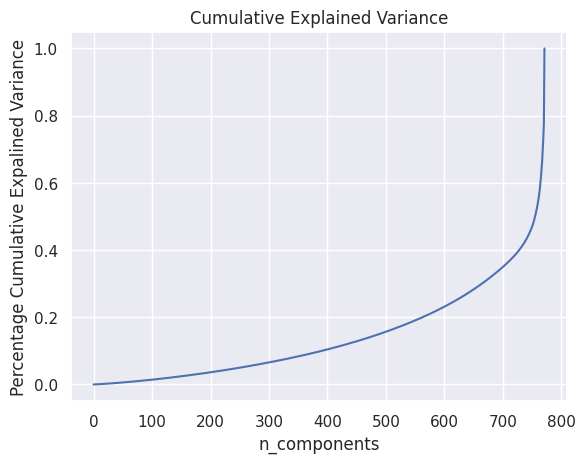

In [63]:
#cumulative eigen values
plt.title("Cumulative Explained Variance")
plt.xlabel('n_components')
plt.ylabel('Percentage Cumulative Expalined Variance')
plt.plot(np.cumsum(percentage_explained_variance))

- OBSERVATION

<b> 1.)From the above Figure it is clear that PCA is not a very good feature engineering technique as it is not giving a very promising result</b>

<b> 2.) The whole idea of PCA was to reduce the dimensions, but from the above figure one can figure out that to explain just 50% of the total variance, one need to use above 700 dimensions, original being 772 dimensions.</b>



#### Cell Features

##### Variance Threshold

In [65]:
selector = VarianceThreshold(threshold = 2)
selector.fit_transform(train_merge[cell_features])

array([[-0.06  ,  0.1083,  0.6864, ..., -0.3981,  0.2139,  0.3801],
       [ 0.0927,  0.2723,  0.2772, ...,  0.1522,  0.1241,  0.6077],
       [-0.1312, -1.464 ,  0.3394, ..., -0.6417, -0.2187, -1.408 ],
       ...,
       [ 1.065 ,  0.6329,  0.3742, ...,  0.2256,  0.7592,  0.6656],
       [ 0.5377,  1.324 ,  0.9679, ...,  0.1732,  0.7015, -0.629 ],
       [-2.389 , -2.035 , -1.108 , ..., -3.577 , -0.4775, -2.15  ]])

In [67]:
# selecting feature which having variance greater the 1
train_merge[cell_features].columns[selector.get_support()]

Index(['c-0', 'c-1', 'c-2', 'c-3', 'c-4', 'c-5', 'c-6', 'c-7', 'c-8', 'c-9',
       'c-10', 'c-11', 'c-12', 'c-13', 'c-14', 'c-15', 'c-16', 'c-17', 'c-18',
       'c-19', 'c-20', 'c-21', 'c-22', 'c-23', 'c-24', 'c-25', 'c-26', 'c-27',
       'c-28', 'c-29', 'c-30', 'c-31', 'c-32', 'c-33', 'c-34', 'c-35', 'c-36',
       'c-38', 'c-39', 'c-40', 'c-41', 'c-42', 'c-43', 'c-44', 'c-45', 'c-46',
       'c-47', 'c-48', 'c-49', 'c-50', 'c-51', 'c-52', 'c-53', 'c-54', 'c-55',
       'c-56', 'c-57', 'c-59', 'c-60', 'c-61', 'c-62', 'c-63', 'c-64', 'c-65',
       'c-66', 'c-67', 'c-68', 'c-69', 'c-70', 'c-71', 'c-72', 'c-73', 'c-75',
       'c-76', 'c-77', 'c-78', 'c-79', 'c-80', 'c-81', 'c-82', 'c-83', 'c-84',
       'c-85', 'c-86', 'c-87', 'c-88', 'c-89', 'c-90', 'c-91', 'c-92', 'c-93',
       'c-94', 'c-95', 'c-96', 'c-97', 'c-98'],
      dtype='object')

In [68]:
# features which are having variance less than 1
[cols for cols in train_merge[cell_features] if cols not in train_merge[cell_features].columns[selector.get_support()]]

['c-37', 'c-58', 'c-74', 'c-99']

- OBSERVATION

<b>1.) There are 96 cell features which are important as they show  variance greater than 2</b>

<b>2.) One thing is clear that all the cell features show high variance but there are 4 cell features with least variance, 'c-37', 'c-58', 'c-74', 'c-99'.</b>
    
<b>3.) But  we have no idea what should be the ideal threshold of variance for removal, because based on threshold only we can remove features, hence this method is not too useful.</b>

##### correaltion between Cell features and target

In [13]:
copy_cells = cell_features.copy()
copy_cells.extend(scored_target)
train_cell_MOA = train_merge[copy_cells]
corr_cell_MOA = train_cell_MOA.corr()

In [71]:
positive_corr = correlated_features_MOA(corr_cell_MOA, 101, 0, 'MOAs', 'Cells', cell_features, type_positive = True)
positive_corr.sort_values(by = 'correlation', ascending = False).head(10)

,MOAs,Cells,correlation
13462,raf_inhibitor,c-19,0.068973
7807,glucocorticoid_receptor_agonist,c-87,0.067417
7774,glucocorticoid_receptor_agonist,c-53,0.061617
7739,glucocorticoid_receptor_agonist,c-16,0.056922
8968,hmgcr_inhibitor,c-44,0.056327
7781,glucocorticoid_receptor_agonist,c-60,0.055990
9002,hmgcr_inhibitor,c-81,0.055311
8961,hmgcr_inhibitor,c-37,0.054785
8953,hmgcr_inhibitor,c-29,0.053469
8979,hmgcr_inhibitor,c-57,0.052396


In [72]:
negative_corr = correlated_features_MOA(corr_cell_MOA, 101, 0, 'MOAs', 'Cells', cell_features, type_positive = False)
negative_corr.sort_values(by = 'correlation', ascending = False).head(10)

,MOAs,Cells,correlation
3941,tropomyosin_receptor_kinase_inhibitor,c-67,-0.000002
520,atm_kinase_inhibitor,c-99,-0.000003
545,atp-sensitive_potassium_channel_antagonist,c-84,-0.000004
201,alk_inhibitor,c-0,-0.000011
1447,dihydrofolate_reductase_inhibitor,c-72,-0.000014
2372,mdm_inhibitor,c-67,-0.000020
2943,pdk_inhibitor,c-56,-0.000035
10,adenylyl_cyclase_activator,c-46,-0.000037
3228,protein_phosphatase_inhibitor,c-75,-0.000038
2286,laxative,c-53,-0.000039


- OBSERVATION

<b> 1.) There is not much of positive correlation between MoAs and cells but there are few pairs with significant negative correlation.</b>

<b> 2.) There  highest positive correlated value observed is 0.068973 between 'c-19' and 'raf_inhibitor' and highest negative correlated value is -0.815505 between 'c-78' and 'proteasome_inhibitor' </b>

##### Principal Component Analysis (PCA)

In [73]:
standardized_data = StandardScaler().fit_transform(train_1[cell_features])
standardized_data.shape

(23814, 100)

In [75]:
cov_mat_data = (1 / standardized_data.shape[0]) * np.matmul(standardized_data.T, standardized_data)
print(cov_mat_data.shape)

eigen_values, eigen_vectors = eigh(cov_mat_data, eigvals = (0, 99))
print(standardized_data.shape, eigen_vectors.shape)

#Let's compute the percentage variance explanined and then cumulative distribution of it
percentage_explained_variance=[]
for i in eigen_values:
    percentage_explained_variance.append(i / sum(eigen_values))

(100, 100)
(23814, 100) (100, 100)


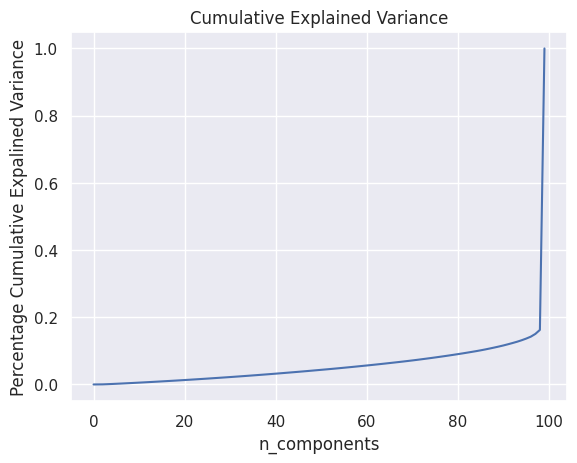

In [76]:
#cumulative eigen values
plt.title("Cumulative Explained Variance")
plt.xlabel('n_components')
plt.ylabel('Percentage Cumulative Expalined Variance')
plt.plot(np.cumsum(percentage_explained_variance))

- OBSERVATION

<b> 1.) From the above Figure it is clear that PCA is not a very good feature engineering technique as it is not giving a very promising result</b>

<b> 2.) The whole idea of PCA was to reduce the dimesnions, but from the above figure one can figure out that to explain just 0% of the total variance, one need to use above 90 dimnesions, original being 100 dimensions.</b>


## Data Modeling

- Encoding Categorical Features

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_1['cp_type'] = le.fit_transform(train_1['cp_type'])
train_1['cp_time'] = le.fit_transform(train_1['cp_time'])
train_1['cp_dose'] = le.fit_transform(train_1['cp_dose'])

train_1.sample(5)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
522,id_0565d8be2,1,0,0,0.8358,0.0445,0.6127,-0.5484,-0.0477,0.7344,...,-0.0807,-1.0480,-1.0150,-0.0939,-0.4661,0.8289,-0.5094,0.5260,-0.6249,-0.4602
18664,id_c86e51800,1,0,1,-0.0735,0.3733,1.2770,0.6550,-0.1764,-0.2977,...,0.8167,-0.0833,-0.1682,-0.0377,0.1315,0.0052,-0.1533,-1.0110,-0.0890,0.7696
19285,id_ceee062b9,1,2,1,0.1720,0.7425,0.4085,-0.7836,0.2031,-0.5790,...,0.5918,-2.0340,0.3574,0.3754,0.4949,-0.1273,-0.1540,0.6213,-1.0350,-0.2614
4935,id_352ff3b38,1,0,0,-0.2484,0.6229,-0.2160,0.7491,-0.1508,-0.0678,...,-0.4800,0.1615,0.5629,0.8642,0.1159,-1.1070,0.1773,0.7374,-0.0518,0.2778
19847,id_d4f1b8498,1,2,1,6.9660,0.5553,0.8774,0.6037,4.9060,-2.2680,...,-10.0000,-10.0000,-7.0980,-9.7510,-10.0000,-8.0090,-10.0000,-8.6070,-9.2180,-5.8540


- Train Test Split for Ensemble models

In [13]:
all_data = pd.merge(train_1, scored_target)
print(all_data.shape)
all_data.sample()

(23814, 1082)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
11678,id_7de1fbf38,1,1,0,0.6967,-1.157,1.914,-0.8219,-0.7903,-0.7729,...,0,0,0,0,0,0,0,0,0,0


In [14]:
x = train_1.iloc[:, 1:]
y = scored_target.iloc[:, 1:]
print(x.shape, y.shape)

(23814, 875) (23814, 206)


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

print('Number of data points in train data:', x_train.shape)
print('Number of data points in test data:', x_test.shape)
print('Number of data points in x_cv :', x_cv.shape)

Number of data points in train data: (15240, 875)
Number of data points in test data: (4763, 875)
Number of data points in x_test_1 : (3811, 875)


In [7]:
# import important libraries
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.metrics import log_loss
import pickle

### Classifier Chain

- GaussianNB

In [21]:
%%time
model = ClassifierChain(GaussianNB())
model.fit(x_train, y_train)

CPU times: user 47.4 s, sys: 25.3 s, total: 1min 12s
Wall time: 1min 13s


ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])

In [22]:
%%time

pred_cv = model.predict(x_cv)
pred_test = model.predict(x_test)
print("LOGLOSS FOR X_cv :", log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :", log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 25.542423955437204
LOGLOSS FOR X_test : 25.17594428095383
CPU times: user 24.6 s, sys: 7.58 s, total: 32.2 s
Wall time: 32.2 s


- Random Forest 

In [23]:
from sklearn.ensemble import RandomForestClassifier
model_1 = ClassifierChain(classifier = RandomForestClassifier(max_depth = 7, n_estimators = 75))
model_1.fit(x_train, y_train)

ClassifierChain(classifier=RandomForestClassifier(max_depth=7, n_estimators=75),
                require_dense=[True, True])

In [24]:
pred_cv = model_1.predict(x_cv)
pred_test = model_1.predict(x_test)
print("LOGLOSS FOR X_cv :", log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :", log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 3.4572348459135225
LOGLOSS FOR X_test : 3.421365391667976


In [25]:
pickle.dump((model_1), open('random_forest.pkl', 'wb'))

### LABEL POWERSET

- KNeighborsClassifier

In [26]:
%%time

model = LabelPowerset(KNeighborsClassifier())
model.fit(x_train, y_train)

CPU times: user 455 ms, sys: 940 ms, total: 1.39 s
Wall time: 1.46 s


LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])

In [ ]:
pred_cv = model.predict(x_cv)
pred_test = model.predict(x_test)

In [30]:
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 5.44330573299146
LOGLOSS FOR X_test : 5.257019985187621


- ExtraTreeClassifier

In [17]:
from sklearn.tree import ExtraTreeClassifier

model = LabelPowerset(ExtraTreeClassifier())
model.fit(x_train, y_train)

LabelPowerset(classifier=ExtraTreeClassifier(), require_dense=[True, True])

In [20]:
pred_cv = model.predict(x_cv)
pred_test = model.predict(x_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 14.95843492347379
LOGLOSS FOR X_test : 14.526383581129462


- SGDClassifier

In [21]:
%%time

model = LabelPowerset(SGDClassifier())
model.fit(x_train, y_train)

CPU times: user 2min 45s, sys: 413 ms, total: 2min 45s
Wall time: 2min 46s


LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])

In [22]:
pred_cv = model.predict(x_cv)
pred_test = model.predict(x_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 8.370829203674246
LOGLOSS FOR X_test : 7.8619461441034595


### ADAPTED ALGORITHM

- MLKNN

In [ ]:
from scipy.sparse import csr_matrix, lil_matrix           
x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

In [24]:
model_mlKnn = MLkNN(k = 30)
model_mlKnn.fit(x_train, y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f813f367550>
Traceback (most recent call last):
  File "/home/abdelmoneim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/abdelmoneim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/abdelmoneim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/abdelmoneim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


MLkNN(k=30)

In [26]:
pred_cv = model_mlKnn.predict(x_cv)
pred_test = model_mlKnn.predict(x_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f813f367040>
Traceback (most recent call last):
  File "/home/abdelmoneim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/abdelmoneim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/abdelmoneim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/abdelmoneim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_itera

In [27]:
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 3.712033448656058
LOGLOSS FOR X_test : 3.769261277572298


#### Comparison between models

In [1]:
import pandas as pd
best_model = pd.DataFrame({'ClassifierChain (GaussianNB)': 25.18, 'ClassifierChain (Random Forest)':  3.42,
                           'Label powerset (k-NN)':  5.26, 'Label powerset (ExtraTreeClassifier)': 14.52,
                           'Label powerset (SGDClassifier)': 7.86, 'MLKNN (30)': 3.77,
                           'ONE VS REST (LOGISTIC REGRESSION)': 7.99, 'ONE VS REST (GAUSSIANNB)': 6.79,
                           'ONE VS REST (ExtraTreeClassifier)': 12.07, 'ONE VS REST (SGDClassifier)': 7.97,
                           'ONE VS REST (LinearSVC)': 10.78, 'BINARY RELEVANCE (GAUSSIANNB)': 6.79,
                           'MLKNN (20)': 3.75, 'MLkNN (10)': 3.92}, index = ['Log Loss'])
best_model

,ClassifierChain (GaussianNB),ClassifierChain (Random Forest),Label powerset (k-NN),Label powerset (ExtraTreeClassifier),Label powerset (SGDClassifier),MLKNN (30),ONE VS REST (LOGISTIC REGRESSION),ONE VS REST (GAUSSIANNB),ONE VS REST (ExtraTreeClassifier),ONE VS REST (SGDClassifier),ONE VS REST (LinearSVC),BINARY RELEVANCE (GAUSSIANNB),MLKNN (20),MLkNN (10)
Log Loss,25.18,3.42,5.26,14.52,7.86,3.77,7.99,6.79,12.07,7.97,10.78,6.79,3.75,3.92


C:\Users\DELL\AppData\Local\Temp\ipykernel_6904\3604455144.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_model.transpose(), x=best_model.columns, y='Log Loss', palette='viridis')


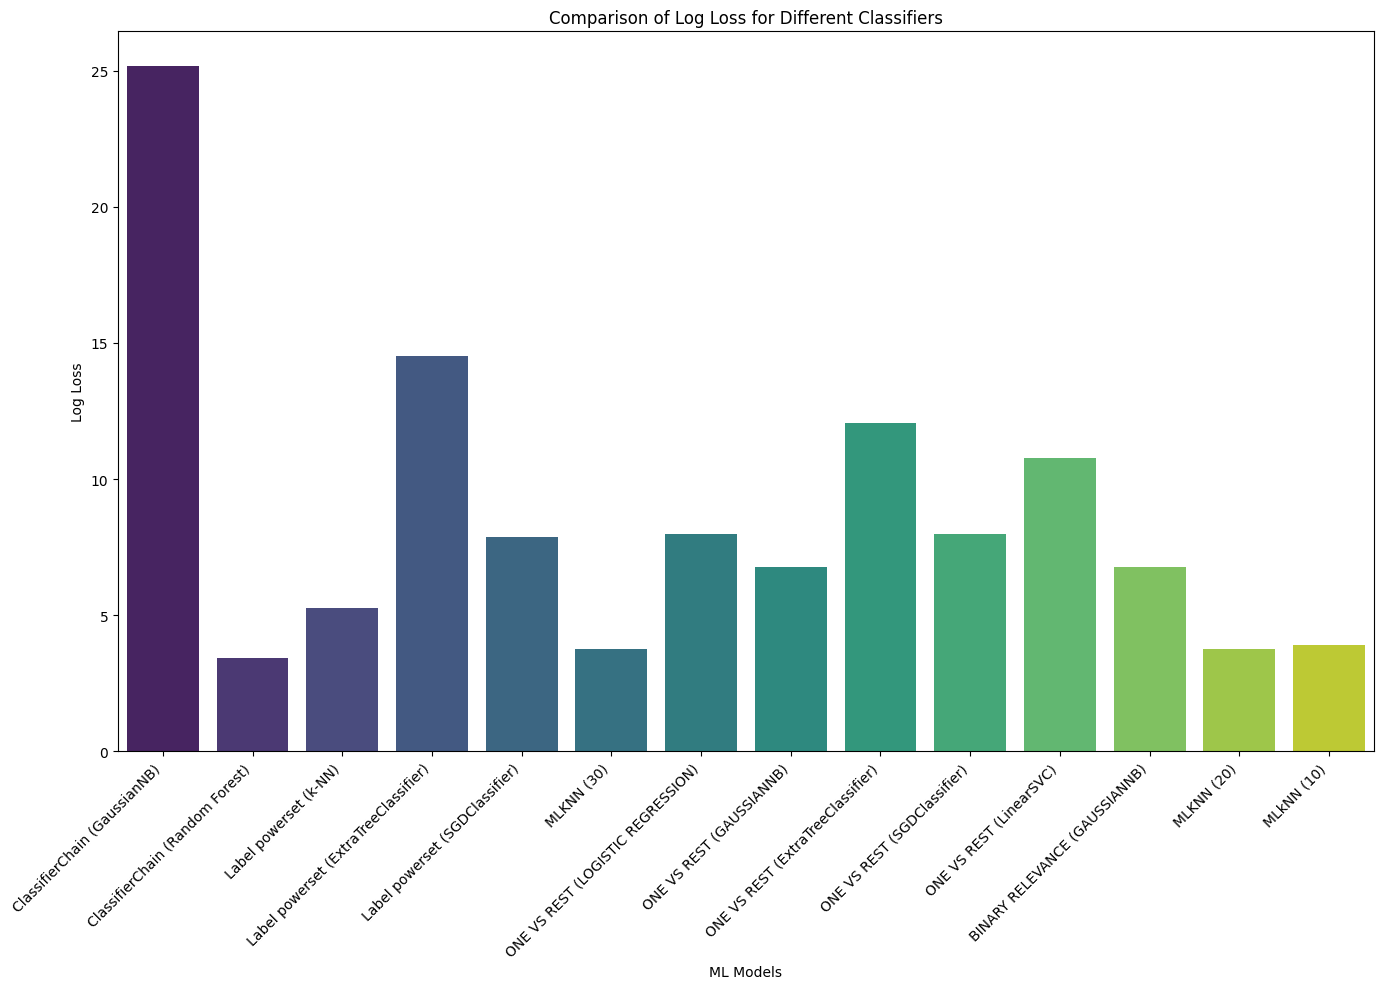

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size to ensure clarity and sufficient space
plt.figure(figsize=(14, 10))

# Use a colorful palette and plot the data
# 'deep' is a palette with vibrant colors, but you can choose others like 'muted', 'bright', etc.
sns.barplot(data=best_model.transpose(), x=best_model.columns, y='Log Loss', palette='viridis')

# Rotate x-axis labels to ensure they are readable and do not overlap
plt.xticks(rotation=45, ha="right")
# Optionally, adjust the y-axis limit to ensure all bars are visible, depending on your data
# plt.ylim(0, your_max_log_loss_value)

# Add labels and title for clarity
plt.ylabel('Log Loss')
plt.xlabel('ML Models')
plt.title('Comparison of Log Loss for Different Classifiers')

# Display the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()

## Final PIPELINE with best model

In [45]:
# Function to preprocess data
def preprocess(data):
    data['cp_type'] = data['cp_type'].map({'trt_cp' : 0 , 'ctl_vehicle' : 1}).values.reshape(-1, 1)
    data['cp_time'] = data['cp_time'].map({24 : 0 , 72 : 1 , 48 : 2}).values.reshape(-1, 1)
    data['cp_dose'] = data['cp_dose'].map({'D1' : 0 , 'D2' : 1}).values.reshape(-1, 1)
    return data

In [9]:
from sklearn.pipeline import Pipeline

random_forest_model = pickle.load(open('random_forest.pkl', 'rb'))
pipe = Pipeline([('random forest', random_forest_model)])

In [46]:
test_copy = test.copy()

In [47]:
preprocess(test_copy)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,0,0,0,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,0,1,0,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,1,0,0,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,0,0,1,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,0,2,0,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,id_ff7004b87,0,0,0,0.4571,-0.5743,3.3930,-0.6202,0.8557,1.6240,...,-1.1790,-0.6422,-0.4367,0.0159,-0.6539,-0.4791,-1.2680,-1.1280,-0.4167,-0.6600
3978,id_ff925dd0d,0,0,0,-0.5885,-0.2548,2.5850,0.3456,0.4401,0.3107,...,0.0210,0.5780,-0.5888,0.8057,0.9312,1.2730,0.2614,-0.2790,-0.0131,-0.0934
3979,id_ffb710450,0,1,0,-0.3985,-0.1554,0.2677,-0.6813,0.0152,0.4791,...,0.4418,0.9153,-0.1862,0.4049,0.9568,0.4666,0.0461,0.5888,-0.4205,-0.1504
3980,id_ffbb869f2,0,2,1,-1.0960,-1.7750,-0.3977,1.0160,-1.3350,-0.2207,...,0.3079,-0.4473,-0.8192,0.7785,0.3133,0.1286,-0.2618,0.5074,0.7430,-0.0484


In [48]:
test_copy = test_copy.iloc[:, 1:]

In [50]:
prediction = pipe.predict(test_copy).toarray()

In [51]:
prediction.shape

(3982, 206)

In [52]:
submission = pd.DataFrame(prediction ,columns = [i for i in scored_target.iloc[:, 1:]])
submission['sig_id'] = test['sig_id']

In [53]:
submission.shape

(3982, 207)

In [64]:
submission.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,id_001897cda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,id_002429b5b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,id_00276f245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,id_0027f1083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
submission.to_csv("submission.csv",index=False)